<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


C:\Users\rahim\AppData\Local\Temp\ipykernel_9200\1894173976.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='coolwarm')


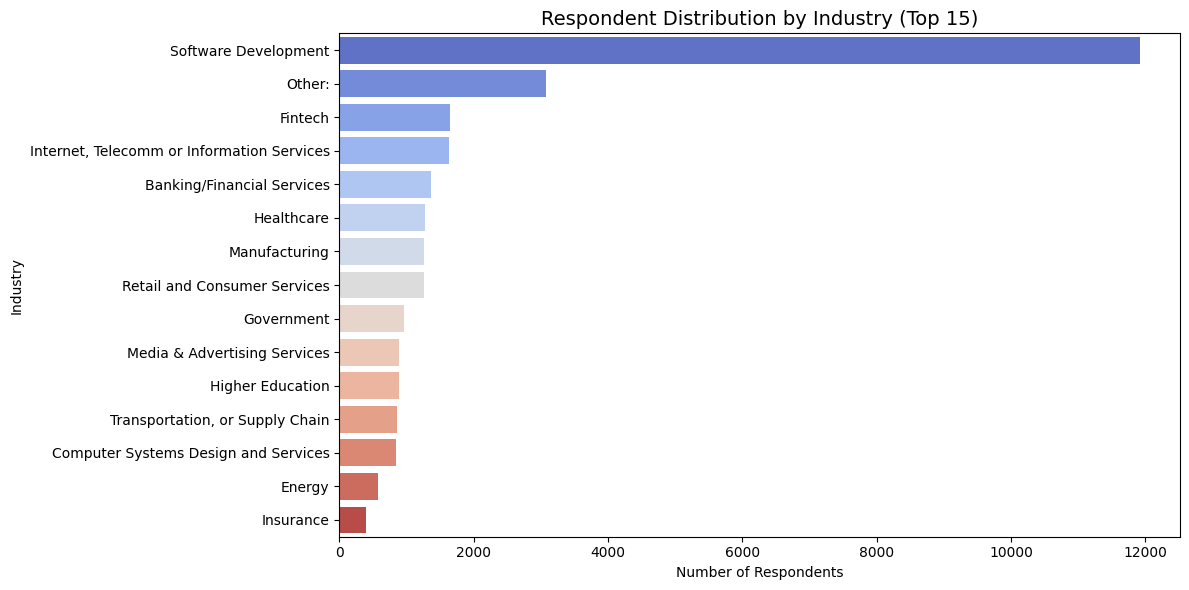

In [3]:
##Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Count values for 'Industry' column
industry_counts = df['Industry'].value_counts().head(15)  # limit to top 15 industries for readability

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='coolwarm')
plt.title('Respondent Distribution by Industry (Top 15)', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
# Step 1: Basic statistics
comp = df['ConvertedCompYearly'].dropna()  # remove NaNs
mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()

print(f"💰 Mean Compensation: {mean_comp:,.2f}")
print(f"💰 Median Compensation: {median_comp:,.2f}")
print(f"📊 Standard Deviation: {std_comp:,.2f}")

# Step 2: Define threshold for outliers (3 SD above mean)
threshold = mean_comp + 3 * std_comp
print(f"\n🚨 Outlier Threshold: {threshold:,.2f}")

# Step 3: Identify outliers
outliers = df[df['ConvertedCompYearly'] > threshold]
print(f"\n🔎 Number of high compensation outliers: {len(outliers)}")

# Optional: Show top 5 highest earners
outliers_sorted = outliers.sort_values(by='ConvertedCompYearly', ascending=False)
outliers_sorted[['Country', 'ConvertedCompYearly', 'Employment', 'JobSat']].head()

💰 Mean Compensation: 86,155.29
💰 Median Compensation: 65,000.00
📊 Standard Deviation: 186,756.97

🚨 Outlier Threshold: 646,426.21

🔎 Number of high compensation outliers: 89


,Country,ConvertedCompYearly,Employment,JobSat
15837,Ethiopia,16256603.0,"Independent contractor, freelancer, or self-em...",NaN
12723,South Africa,13818022.0,"Employed, full-time;Independent contractor, fr...",10.0
28379,Taiwan,9000000.0,"Employed, full-time",10.0
17593,Brazil,6340564.0,"Employed, full-time",6.0
17672,Ukraine,4936778.0,"Employed, full-time",7.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


📌 Q1 (25th percentile): 32,712.00
📌 Q3 (75th percentile): 107,971.50
📦 IQR: 75,259.50
⬇ Lower Bound: -80,177.25
⬆ Upper Bound: 220,860.75

🔍 Number of IQR outliers: 978


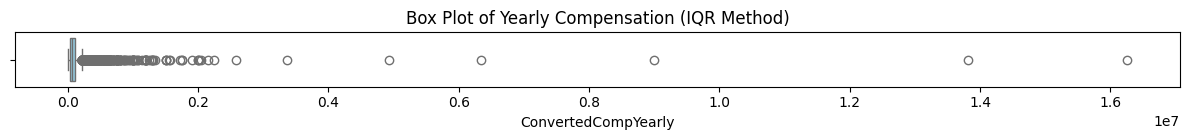

In [5]:
##Write your code here
# Step 1: Drop NaNs from compensation column
comp = df['ConvertedCompYearly'].dropna()

# Step 2: Calculate Q1, Q3, and IQR
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"📌 Q1 (25th percentile): {Q1:,.2f}")
print(f"📌 Q3 (75th percentile): {Q3:,.2f}")
print(f"📦 IQR: {IQR:,.2f}")
print(f"⬇ Lower Bound: {lower_bound:,.2f}")
print(f"⬆ Upper Bound: {upper_bound:,.2f}")

# Step 3: Identify outliers
iqr_outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"\n🔍 Number of IQR outliers: {len(iqr_outliers)}")

# Step 4: Visualize with a box plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 1.5))
sns.boxplot(x=comp, color='skyblue')
plt.title('Box Plot of Yearly Compensation (IQR Method)')
plt.xlabel('ConvertedCompYearly')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
# Reuse IQR bounds from Step 4
clean_df = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate change in size
original_size = df.shape[0]
cleaned_size = clean_df.shape[0]

print(f"📊 Original dataset size: {original_size}")
print(f"✅ Cleaned dataset size (no IQR outliers): {cleaned_size}")
print(f"🧹 Rows removed: {original_size - cleaned_size}")

📊 Original dataset size: 65437
✅ Cleaned dataset size (no IQR outliers): 22457
🧹 Rows removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


C:\Users\rahim\AppData\Local\Temp\ipykernel_9200\231995537.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['YearsCodeProNum'] = clean_df['YearsCodePro'].apply(convert_years)
C:\Users\rahim\AppData\Local\Temp\ipykernel_9200\231995537.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['AgeNum'] = clean_df['Age'].map(age_map)
C:\Users\rahim\AppData\Local\Temp\ipykernel_9200\231995537.py:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

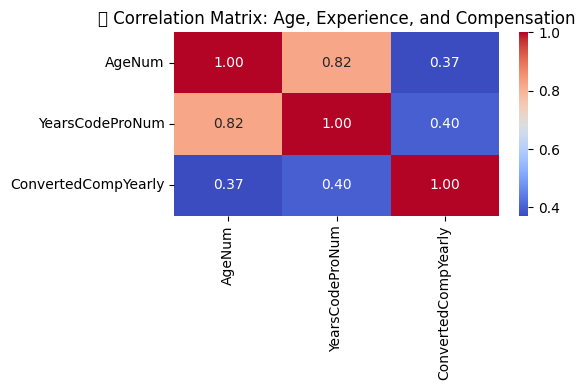

In [8]:
##Write your code here
# Convert 'YearsCodePro' to numeric values
def convert_years(x):
    if isinstance(x, str):
        if 'Less than' in x:
            return 0.5
        elif 'More than' in x:
            return 51
        try:
            return float(x)
        except:
            return None
    return x

# Apply to column
clean_df['YearsCodeProNum'] = clean_df['YearsCodePro'].apply(convert_years)

# Map age again (if not done yet)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    'Prefer not to say': None,
    'NA': None
}
clean_df['AgeNum'] = clean_df['Age'].map(age_map)

# Select numeric columns
numeric_cols = clean_df[['AgeNum', 'YearsCodeProNum', 'ConvertedCompYearly']].dropna()

# Compute correlation
corr_matrix = numeric_cols.corr(method='pearson')

# Plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('📊 Correlation Matrix: Age, Experience, and Compensation')
plt.tight_layout()
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
